# 데이터 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
import random
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline

In [2]:
df = pd.read_excel("Churn_final.xlsx")
print(df.shape)
df.head()

(7043, 13)


,Customer ID,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,8779-QRDMV,78,0,None,2,1,1,2,Month-to-Month,1,39.65000,59.65000,1
1,7495-OOKFY,74,1,Offer E,5,1,0,1,Month-to-Month,8,80.65000,1024.10000,1
2,1658-BYGOY,71,3,Offer D,3,0,2,1,Month-to-Month,18,95.45000,1910.88000,1
3,4598-XLKNJ,78,1,Offer C,3,2,2,1,Month-to-Month,25,98.50000,2995.07000,1
4,4846-WHAFZ,80,1,Offer C,1,0,0,1,Month-to-Month,37,76.50000,3102.36000,1


# One-Hot Encoding

In [3]:
df = pd.get_dummies(df, columns = ['Membership', 'Contract'])
df

,Customer ID,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Churn Value,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
0,8779-QRDMV,78,0,2,1,1,2,1,39.65000,59.65000,1,1,0,0,0,0,0,1,0,0
1,7495-OOKFY,74,1,5,1,0,1,8,80.65000,1024.10000,1,0,0,0,0,0,1,1,0,0
2,1658-BYGOY,71,3,3,0,2,1,18,95.45000,1910.88000,1,0,0,0,0,1,0,1,0,0
3,4598-XLKNJ,78,1,3,2,2,1,25,98.50000,2995.07000,1,0,0,0,1,0,0,1,0,0
4,4846-WHAFZ,80,1,1,0,0,1,37,76.50000,3102.36000,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,30,0,5,0,0,4,72,21.15000,3039.53000,0,1,0,0,0,0,0,0,0,1
7039,6840-RESVB,38,2,5,3,2,2,24,84.80000,2807.47000,0,0,0,0,1,0,0,0,1,0
7040,2234-XADUH,30,2,3,2,2,1,72,103.20000,9453.04000,0,1,0,0,0,0,0,0,1,0
7041,4801-JZAZL,32,2,2,1,0,2,11,29.60000,319.21000,0,1,0,0,0,0,0,1,0,0


# 학습/테스트셋 분리

In [4]:
from sklearn.model_selection import train_test_split

y_target = df['Churn Value']
X_data = df.drop(['Churn Value', 'Customer ID'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.2, random_state=156)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 18), (1409, 18), (5634,), (1409,))

In [5]:
X_data

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
0,78,0,2,1,1,2,1,39.65000,59.65000,1,0,0,0,0,0,1,0,0
1,74,1,5,1,0,1,8,80.65000,1024.10000,0,0,0,0,0,1,1,0,0
2,71,3,3,0,2,1,18,95.45000,1910.88000,0,0,0,0,1,0,1,0,0
3,78,1,3,2,2,1,25,98.50000,2995.07000,0,0,0,1,0,0,1,0,0
4,80,1,1,0,0,1,37,76.50000,3102.36000,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,30,0,5,0,0,4,72,21.15000,3039.53000,1,0,0,0,0,0,0,0,1
7039,38,2,5,3,2,2,24,84.80000,2807.47000,0,0,0,1,0,0,0,1,0
7040,30,2,3,2,2,1,72,103.20000,9453.04000,1,0,0,0,0,0,0,1,0
7041,32,2,2,1,0,2,11,29.60000,319.21000,1,0,0,0,0,0,1,0,0


# 학습 데이터셋 정규화
sklearn 으로 데이터 스케일링을 할 경우, 훈련용 데이터셋과 테스트용 데이터셋에 각각 다른 과정이 필요합니다.

훈련용 데이터셋은 fit 메서드를 적용시킨 후 transform 해주어야 하고, 테스트용 데이터셋에는 transform 을 적용시켜주면 됩니다.

In [6]:
# Initialize variable
X_train_origin, X_test_origin, y_train_origin, y_test_origin = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Numeric Only
Numeric_column_list = []
for i in range(len(X_data.columns)):
    if X_data[X_data.columns[i]].dtype == 'float64' or X_data[X_data.columns[i]].dtype == 'int64':
            Numeric_column_list.append(X_data.columns[i])

numeric_train_data, numeric_test_data = X_train[Numeric_column_list], X_test[Numeric_column_list]

scaler = MinMaxScaler()

X_train[Numeric_column_list] = scaler.fit_transform(numeric_train_data)
X_test[Numeric_column_list] = scaler.transform(numeric_test_data)

X_test

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
6493,0.68852,0.00000,0.50000,0.00000,0.00000,1.00000,0.23944,0.01791,0.06277,1,0,0,0,0,0,1,0,0
3431,0.60656,0.00000,0.75000,0.00000,0.00000,1.00000,0.18310,0.01294,0.04512,1,0,0,0,0,0,0,1,0
3991,0.37705,0.00000,1.00000,0.00000,0.00000,1.00000,0.54930,0.02338,0.14397,1,0,0,0,0,0,0,0,1
6709,0.06557,0.22222,0.50000,0.00000,0.50000,0.66667,0.07042,0.36418,0.03977,1,0,0,0,0,0,1,0,0
4859,0.32787,0.00000,0.75000,0.75000,0.00000,0.66667,0.52113,0.47662,0.27315,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.85246,0.00000,0.00000,0.25000,1.00000,0.00000,0.18310,0.81542,0.16780,1,0,0,0,0,0,1,0,0
1858,0.31148,0.00000,0.75000,0.00000,0.00000,0.66667,0.11268,0.26766,0.04480,1,0,0,0,0,0,1,0,0
1734,0.21311,0.11111,0.00000,0.50000,0.00000,0.66667,0.29577,0.36716,0.11126,1,0,0,0,0,0,1,0,0
4033,0.62295,0.22222,0.50000,0.00000,0.00000,1.00000,0.04225,0.01791,0.01452,1,0,0,0,0,0,1,0,0


# 모델 학습

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9510290986515259
f1-score: 0.9026798307475317
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1043
           1       0.93      0.87      0.90       366

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print('정확도:', accuracy)

# 민감도 계산 (재현율)
sensitivity = recall_score(y_test, y_pred)
print('민감도:', sensitivity)

# 특이도 계산
specificity = recall_score(y_test, y_pred, pos_label=0)
print('특이도:', specificity)

# 정밀도 계산
precision = precision_score(y_test, y_pred)
print('정밀도:', precision)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)
print('F1 스코어:', f1)

# classification_report를 사용하여 세부적인 평가 지표 출력
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


정확도: 0.9510290986515259
민감도: 0.8743169398907104
특이도: 0.9779482262703739
정밀도: 0.9329446064139941
F1 스코어: 0.9026798307475317
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1043
           1       0.93      0.87      0.90       366

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



In [11]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1020   23]
 [  46  320]]


교차검증 정확도평균 / 테스트데이터 정확도 평균

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 모델 생성
model = sgd_model

# 교차 검증을 통해 모델의 일반화 성능을 평가합니다.
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-폴드 교차 검증
print("교차 검증 정확도 평균:", np.mean(cv_scores))

# 모델을 학습 데이터로 학습시킵니다.
model.fit(X_train, y_train)

# 테스트 데이터로 모델을 평가합니다.
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 정확도:", test_accuracy)


교차 검증 정확도 평균: 0.9474624941489453
테스트 데이터 정확도: 0.9510290986515259


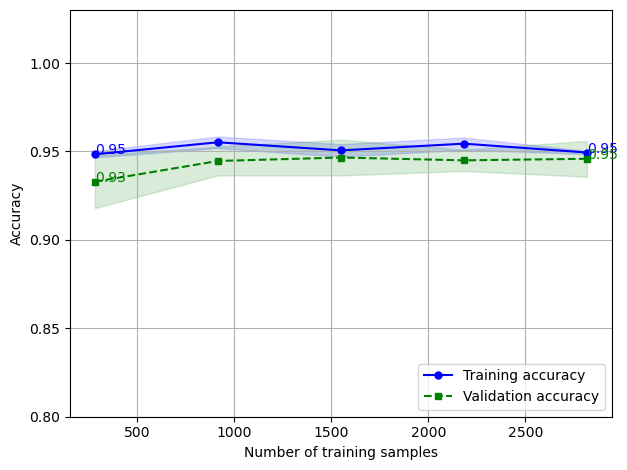

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [14]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.94941
last_validation_accuracy: 0.94586
L_V_diff: 0.00355


In [15]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)

# f1 스코어 계산
f1 = f1_score(y_test, y_pred)
print("F1 스코어:", f1)

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 진짜 양성 (True Positive)
true_positive = conf_matrix[1, 1]

# 진짜 음성 (True Negative)
true_negative = conf_matrix[0, 0]

# 거짓 양성 (False Positive)
false_positive = conf_matrix[0, 1]

# 거짓 음성 (False Negative)
false_negative = conf_matrix[1, 0]

# 민감도 (Sensitivity 또는 True Positive Rate, TPR)
sensitivity = true_positive / (true_positive + false_negative)
print("민감도 (Sensitivity):", sensitivity)

# 특이도 (Specificity 또는 True Negative Rate, TNR)
specificity = true_negative / (true_negative + false_positive)
print("특이도 (Specificity):", specificity)

# 정밀도 (Precision)
precision = true_positive / (true_positive + false_positive)
print("정밀도 (Precision):", precision)

# classification_report를 사용하여 정밀도, 재현율, F1 스코어, 지원도 출력
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


정확도: 0.9510290986515259
F1 스코어: 0.9026798307475317
민감도 (Sensitivity): 0.8743169398907104
특이도 (Specificity): 0.9779482262703739
정밀도 (Precision): 0.9329446064139941
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1043
           1       0.93      0.87      0.90       366

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



## 하이퍼파라미터 튜닝

### 주요 파라미터 설정

#### loss='log'
로지스틱 회귀 모델을 사용하여 이진 분류

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

'''
max_iter=10000 : 계산에 사용할 작업 수 
tol=1e-5 : 반복학습이 진행될 때 마다 loss값이 산출 => 이 loss값이 값이 줄어야함. loss값이 tol값보다 작으면 학습중단!
'''

sgd_model_log = SGDClassifier(random_state=42, loss='log_loss', max_iter=10000, tol=0.0001) 


sgd_model_log.fit(X_train, y_train)
y_pred = sgd_model_log.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9467707594038325
f1-score: 0.8942172073342737
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1043
           1       0.92      0.87      0.89       366

    accuracy                           0.95      1409
   macro avg       0.94      0.92      0.93      1409
weighted avg       0.95      0.95      0.95      1409



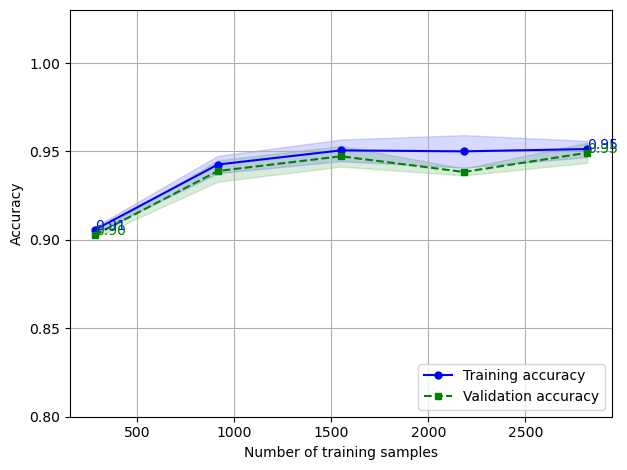

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model_log, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [29]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.95137
last_validation_accuracy: 0.94924
L_V_diff: 0.00213


#### loss='hinge'
SVM 모델을 사용하여 이진 분류를 수행

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

'''
max_iter=10000 : 계산에 사용할 작업 수 
tol=1e-5 : 반복학습이 진행될 때 마다 loss값이 산출 => 이 loss값이 값이 줄어야함. loss값이 tol값보다 작으면 학습중단!
'''

sgd_model_hinge = SGDClassifier(random_state=42, loss='hinge', max_iter=10000, tol=0.001) 


sgd_model_hinge.fit(X_train, y_train)
y_pred = sgd_model_hinge.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.9510290986515259
f1-score: 0.9026798307475317
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1043
           1       0.93      0.87      0.90       366

    accuracy                           0.95      1409
   macro avg       0.94      0.93      0.93      1409
weighted avg       0.95      0.95      0.95      1409



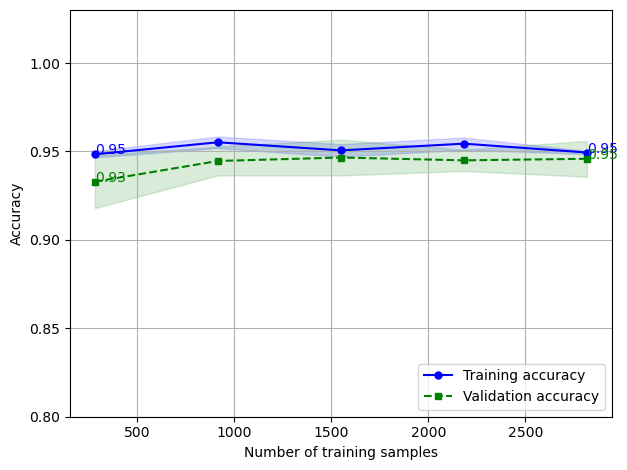

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model_hinge, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [21]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.94941
last_validation_accuracy: 0.94586
L_V_diff: 0.00355


#### loss='modified_huber'

In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sgd_model_huber = SGDClassifier(random_state=42, loss='modified_huber', max_iter=10000, tol=0.001) 


sgd_model_huber.fit(X_train, y_train)
y_pred = sgd_model_huber.predict(X_test)

print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

정확도: 0.815471965933286
f1-score: 0.5149253731343284
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1043
           1       0.81      0.38      0.51       366

    accuracy                           0.82      1409
   macro avg       0.81      0.67      0.70      1409
weighted avg       0.81      0.82      0.79      1409



In [58]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1011   32]
 [ 228  138]]


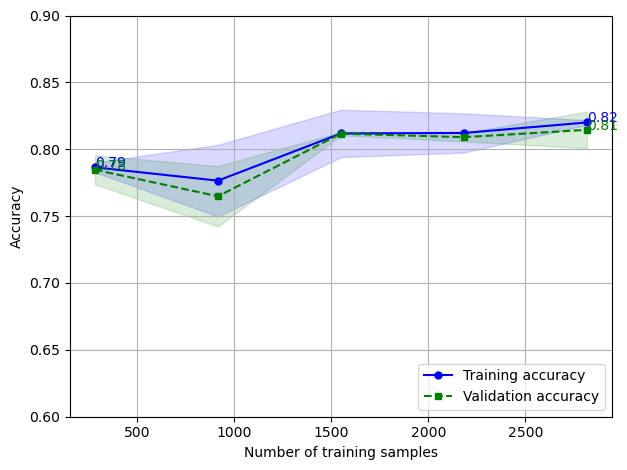

In [53]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_model_huber, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 0.9])
plt.tight_layout()
plt.show()

In [54]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.82002
last_validation_accuracy: 0.81452
L_V_diff: 0.00550


### GridSearchCV

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# 모델 생성
sgd_model = SGDClassifier(random_state=42)

# 탐색할 하이퍼파라미터 그리드 정의
'''
param_grid = {
    'loss': [ 'log_loss', 'perceptron', 'modified_huber'],  # loss 함수의 여러 옵션, 'hinge'는 predict proba 사용 불가
    'penalty': ['l1', 'l2'],  # 정규화 옵션
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000, 10000],  # 반복 횟수
    'tol': [1e-3, 1e-4, 1e-5]  # 중단 기준(loss가 이 값보다 작아지면 중단)
}
'''

# 최종 선택 모델로 다시 평가지표 계산
param_grid = {
    'loss': ['modified_huber'],  # loss 함수의 여러 옵션
    'penalty': ['l1'],  # 정규화 옵션
    "alpha" : [ 0.001],
    'max_iter': [100],  # 반복 횟수
    'tol': [1e-5]  # 중단 기준(loss가 이 값보다 작아지면 중단)
}


# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, cv=3, scoring='accuracy')

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", grid_search.best_params_)

# 최적의 모델 사용
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 결과 출력
print('정확도:', accuracy_score(y_pred, y_test))
print('f1-score:', f1_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


Best Parameters: {'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 100, 'penalty': 'l1', 'tol': 1e-05}
정확도: 0.8332150461320085
f1-score: 0.6767537826685007
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1043
           1       0.68      0.67      0.68       366

    accuracy                           0.83      1409
   macro avg       0.78      0.78      0.78      1409
weighted avg       0.83      0.83      0.83      1409



In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = best_model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print('정확도:', accuracy)

# 민감도 계산 (재현율)
sensitivity = recall_score(y_test, y_pred)
print('민감도:', sensitivity)

# 특이도 계산
specificity = recall_score(y_test, y_pred, pos_label=0)
print('특이도:', specificity)

# 정밀도 계산
precision = precision_score(y_test, y_pred)
print('정밀도:', precision)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred)
print('F1 스코어:', f1)

# classification_report를 사용하여 세부적인 평가 지표 출력
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


정확도: 0.8332150461320085
민감도: 0.6721311475409836
특이도: 0.8897411313518696
정밀도: 0.6814404432132964
F1 스코어: 0.6767537826685007
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1043
           1       0.68      0.67      0.68       366

    accuracy                           0.83      1409
   macro avg       0.78      0.78      0.78      1409
weighted avg       0.83      0.83      0.83      1409



In [10]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[928 115]
 [120 246]]


교차검증 정확도평균 / 테스트데이터 정확도 평균

In [11]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 모델 생성
model = best_model

# 교차 검증을 통해 모델의 일반화 성능을 평가합니다.
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-폴드 교차 검증
print("교차 검증 정확도 평균:", np.mean(cv_scores))


# 테스트 데이터로 모델을 평가합니다.
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 정확도:", test_accuracy)


교차 검증 정확도 평균: 0.812392100248857
테스트 데이터 정확도: 0.8332150461320085


In [14]:
# F score 성능 평가
from sklearn.metrics import precision_score, recall_score

def f_score(beta,y_real, y_pred):
    beta = beta
    pr = precision_score(y_real, y_pred) #정밀도
    re = recall_score(y_real, y_pred) #재현율
    score = (1+beta**2)*(pr*re)/((beta**2*pr)+re)
    return score

print('F1 score : {:.6f}'.format(f_score(1, y_test, y_pred)))
print('F1.5 score : {:.6f}'.format(f_score(1.5,y_test, y_pred)))
print('F2 score : {:.6f}'.format(f_score(2,y_test, y_pred)))

F1 score : 0.676754
F1.5 score : 0.674968
F2 score : 0.673973


In [15]:
F15 = (1.25 * precision * sensitivity) / (0.25 * precision + sensitivity)
F2 = (4 * precision * sensitivity) / (3 * precision + sensitivity)
print(F15, F2)

0.6795580110497238 0.6744345442083619


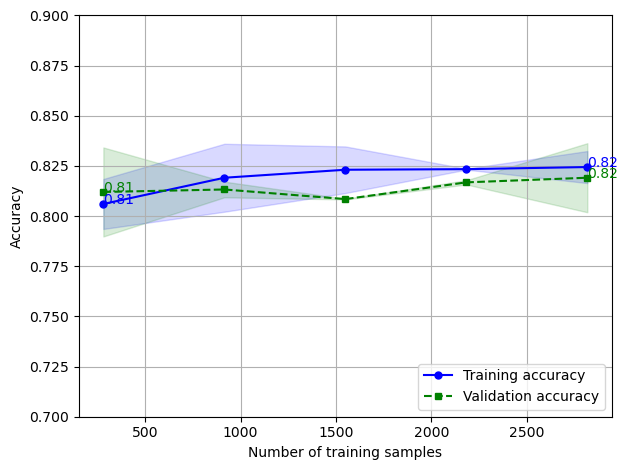

In [16]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=best_model, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

for i, txt in enumerate(train_mean):
    if i in [0, 4]:  # Specify the indices of the markers you want to label
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue')
        plt.text(train_sizes[i], test_mean[i], f'{test_mean[i]:.2f}', color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

In [17]:
last_train_accuracy = train_mean[-1]
print(f"last_train_accuracy: {last_train_accuracy:.5f}")

last_validation_accuracy = test_mean[-1]
print(f"last_validation_accuracy: {last_validation_accuracy:.5f}")

L_V_diff = last_train_accuracy - last_validation_accuracy
print(f"L_V_diff: {L_V_diff:.5f}")

last_train_accuracy: 0.82446
last_validation_accuracy: 0.81913
L_V_diff: 0.00532


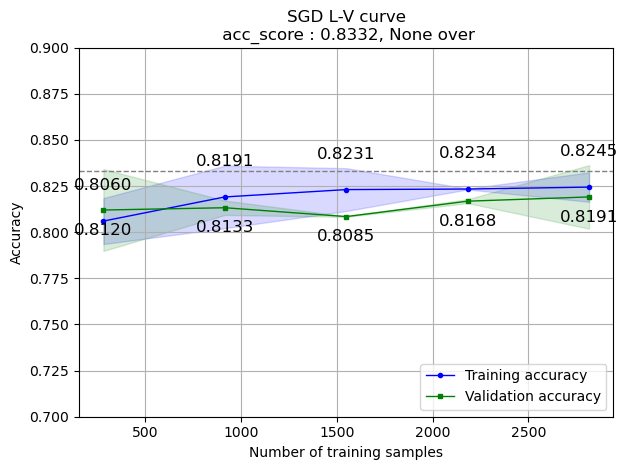

In [18]:
train_sizes, train_scores, test_scores = learning_curve(estimator=best_model, X=X_train, y=y_train, cv=2, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=3, label='Training accuracy', linewidth=1)
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
for i in range(len(train_sizes)):
    height = train_mean[i]
    plt.text(train_sizes[i], height+0.015, '%.4f'%height, ha='center', va='bottom', size = 12)

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=3, label='Validation accuracy', linewidth=1)
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
for i in range(len(train_sizes)):
    height = test_mean[i]
    plt.text(train_sizes[i], height-0.015, '%.4f'%height, ha='center', va='bottom', size = 12)

plt.grid()
plt.title('SGD L-V curve\n acc_score : %.4f, None over'%accuracy)
# plt.axhline(val_score.mean(), color='red', linestyle='--', linewidth=1)
plt.axhline(accuracy, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.9])
plt.tight_layout()
plt.show()

# 학습 결과

* 하이퍼파라미터 튜닝 전 (SGDClassifier(random_state=42))
 * 정확도 : 0.9510290986515259
 * 학습곡선
     * last_train_accuracy: 0.94941
     * last_validation_accuracy: 0.94586
     * L_V_diff: 0.00355


* 주요 하이퍼파라미터 설정 (SGDClassifier(random_state=42, loss='log', max_iter=10000, tol=1e-5))
    * 정확도 : 0.9467707594038325
    * 학습곡선
        * last_train_accuracy: 0.95137
        * last_validation_accuracy: 0.94924
        * L_V_diff: 0.00213
        

* 주요 하이퍼파라미터 설정 (SGDClassifier(random_state=42, loss='hinge', max_iter=10000, tol=1e-5))
    * 정확도 : 0.9510290986515259
    * 학습곡선
        * last_train_accuracy: 0.95261
        * last_validation_accuracy: 0.95030
        * L_V_diff: 0.00231
        
        
* **GridSearchCV (Best Parameters: {'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 100, 'penalty': 'l1', 'tol': 1e-05})**
    * 정확도 : 0.950319375443577
    * 학습곡선
        * last_train_accuracy: 0.95083
        * last_validation_accuracy: 0.94427
        * L_V_diff: 0.00657

**Satisfaction Score 조정 후 재학습 결과**
* GridSearchCV {'alpha': 0.001, 'loss': 'modified_huber', 'max_iter': 100, 'penalty': 'l1', 'tol': 1e-05}
    * 정확도: 0.8332150461320085
    * 민감도: 0.6721311475409836
    * 특이도: 0.8897411313518696
    * 정밀도: 0.6814404432132964
    * F1 score : 0.676754
    * F1.5 score : 0.674968
    * F2 score : 0.673973

# 가상고객 테스트

In [67]:
import pandas as pd

# 빈 데이터프레임 생성
test_df = pd.DataFrame()

test_df['Age'] = np.random.randint(19, 81, 100)
test_df['Number of Dependents'] = np.random.randint(0, 6, 100)
test_df['Membership'] = np.random.choice(['None', 'Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E'], size=100)
test_df['Satisfaction Score'] = np.random.randint(1, 6, 100)
test_df['Tech services'] = np.random.randint(0, 5, 100)
test_df['Streaming services'] = np.random.randint(0, 3, 100)
test_df['Combined Product'] = np.random.randint(1, 5, 100)
test_df['Contract'] = np.random.choice(['Month-to-Month', 'One Year', 'Two Year'], size=100)
test_df['Tenure in Months'] = np.random.randint(1, 73, 100)
test_df['Monthly Charge'] = np.random.randint(18, 119, 100)

# 'Total Revenue' 컬럼 생성
random_values = np.random.randint(-50, 151, size=100)
revenues = (test_df['Tenure in Months'] * test_df['Monthly Charge']) - random_values
test_df['Total Revenue'] = np.maximum(revenues, 0)

test_df

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue
0,79,5,Offer D,4,3,1,2,Two Year,17,76,1240
1,64,3,Offer A,5,1,0,2,Two Year,11,25,265
2,19,1,Offer D,2,3,2,4,Month-to-Month,29,95,2764
3,69,5,Offer B,5,2,1,4,Month-to-Month,38,70,2582
4,68,1,Offer E,3,4,1,4,Month-to-Month,51,43,2136
...,...,...,...,...,...,...,...,...,...,...,...
95,60,1,Offer D,5,3,2,1,Two Year,59,66,3896
96,24,5,Offer B,2,4,0,2,One Year,45,30,1285
97,48,3,Offer B,5,4,2,1,Month-to-Month,33,18,592
98,37,3,Offer E,1,1,0,2,Two Year,49,48,2356


In [68]:
test_df_one = pd.get_dummies(test_df, columns = ['Membership', 'Contract'])
test_df_one

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
0,79,5,4,3,1,2,17,76,1240,0,0,0,0,1,0,0,0,1
1,64,3,5,1,0,2,11,25,265,0,1,0,0,0,0,0,0,1
2,19,1,2,3,2,4,29,95,2764,0,0,0,0,1,0,1,0,0
3,69,5,5,2,1,4,38,70,2582,0,0,1,0,0,0,1,0,0
4,68,1,3,4,1,4,51,43,2136,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,1,5,3,2,1,59,66,3896,0,0,0,0,1,0,0,0,1
96,24,5,2,4,0,2,45,30,1285,0,0,1,0,0,0,0,1,0
97,48,3,5,4,2,1,33,18,592,0,0,1,0,0,0,1,0,0
98,37,3,1,1,0,2,49,48,2356,0,0,0,0,0,1,0,0,1


In [69]:
# 최적의 모델 사용
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [70]:
# 필요한 컬럼 선택
columns_to_use = test_df_one.columns
test_data = test_df_one[columns_to_use]


# 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
predicted_probabilities = best_model.predict_proba(test_data)

# 결과를 데이터프레임에 추가
test_df['이탈점수'] = predicted_probabilities[:, 1]*100  # 클래스 1의 확률을 선택

# 데이터프레임 확인
test_df

,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,이탈점수
0,79,5,Offer D,4,3,1,2,Two Year,17,76,1240,100.00000
1,64,3,Offer A,5,1,0,2,Two Year,11,25,265,100.00000
2,19,1,Offer D,2,3,2,4,Month-to-Month,29,95,2764,100.00000
3,69,5,Offer B,5,2,1,4,Month-to-Month,38,70,2582,100.00000
4,68,1,Offer E,3,4,1,4,Month-to-Month,51,43,2136,99.84058
...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,1,Offer D,5,3,2,1,Two Year,59,66,3896,99.99946
96,24,5,Offer B,2,4,0,2,One Year,45,30,1285,0.00000
97,48,3,Offer B,5,4,2,1,Month-to-Month,33,18,592,0.00000
98,37,3,Offer E,1,1,0,2,Two Year,49,48,2356,0.00491


In [65]:
test_df['이탈점수'][50:]

50     0.00000
51     0.00000
52   100.00000
53     0.00000
54     0.00000
55     0.00000
56     0.00000
57     0.00000
58     0.00000
59     0.00000
60     0.00000
61     0.00000
62     0.00000
63   100.00000
64     0.00000
65   100.00000
66     0.00000
67     0.00000
68     0.00000
69     0.00000
70     0.00000
71     0.00000
72     0.00000
73     0.00000
74     0.00000
75     0.00000
76     0.00000
77     0.00000
78     0.00000
79   100.00000
80     0.00000
81     0.00000
82     0.00000
83     0.00000
84     0.00000
85     0.00000
86     0.00000
87     0.00000
88     0.00000
89     0.00000
90     0.00000
91     0.00000
92     0.00000
93     0.00000
94     0.00000
95     0.00000
96     0.00000
97   100.00000
98   100.00000
99     0.00000
Name: 이탈점수, dtype: float64

In [67]:
X_test

,Age,Number of Dependents,Satisfaction Score,Tech services,Streaming services,Combined Product,Tenure in Months,Monthly Charge,Total Revenue,Membership_None,Membership_Offer A,Membership_Offer B,Membership_Offer C,Membership_Offer D,Membership_Offer E,Contract_Month-to-Month,Contract_One Year,Contract_Two Year
6493,0.68852,0.00000,0.50000,0.00000,0.00000,1.00000,0.23944,0.01791,0.06277,1,0,0,0,0,0,1,0,0
3431,0.60656,0.00000,0.50000,0.00000,0.00000,1.00000,0.18310,0.01294,0.04512,1,0,0,0,0,0,0,1,0
3991,0.37705,0.00000,0.50000,0.00000,0.00000,1.00000,0.54930,0.02338,0.14397,1,0,0,0,0,0,0,0,1
6709,0.06557,0.22222,0.50000,0.00000,0.50000,0.66667,0.07042,0.36418,0.03977,1,0,0,0,0,0,1,0,0
4859,0.32787,0.00000,0.75000,0.75000,0.00000,0.66667,0.52113,0.47662,0.27315,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.85246,0.00000,0.00000,0.25000,1.00000,0.00000,0.18310,0.81542,0.16780,1,0,0,0,0,0,1,0,0
1858,0.31148,0.00000,0.00000,0.00000,0.00000,0.66667,0.11268,0.26766,0.04480,1,0,0,0,0,0,1,0,0
1734,0.21311,0.11111,0.25000,0.50000,0.00000,0.66667,0.29577,0.36716,0.11126,1,0,0,0,0,0,1,0,0
4033,0.62295,0.22222,1.00000,0.00000,0.00000,1.00000,0.04225,0.01791,0.01452,1,0,0,0,0,0,1,0,0


In [36]:
test_data = [[0.68852, 0.00000, 0.5, 0.0000, 0.0000, 1.0, 0.23944,  0.01791, 0.06277, 1, 0,0,0,0,0,1,0,0],
            [0.06557,0.22222, 0.50000, 0,0.5,0.66667, 0.07042,0.36418, 0.03977, 1,0,0,0,0,0,1,0,0 ],
            [0.32787,0.00000, 0.50000, 0.25,1,0.66667, 0.07043,0.56667, 0.36707, 0,0,1,0,0,0,0,0,1]] 
predicted_class = best_model.predict(test_data)

# 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
predicted_proba = best_model.predict_proba(test_data)

# 각 테스트 데이터에 대한 클래스 1일 확률을 출력합니다.
for i, data in enumerate(test_data, start=1):
    predicted_proba = best_model.predict_proba([data])
    probability_of_class_1 = predicted_proba[0][1]
    print(f"테스트 데이터 {i}의 가상 고객이 이탈할 확률:", probability_of_class_1)
    print(f"테스트 데이터 {i}의 가상 고객 이탈 점수:", int(probability_of_class_1 * 100), "점")

테스트 데이터 1의 가상 고객이 이탈할 확률: 0.23856551270931386
테스트 데이터 1의 가상 고객 이탈 점수: 23 점
테스트 데이터 2의 가상 고객이 이탈할 확률: 0.20963418815852788
테스트 데이터 2의 가상 고객 이탈 점수: 20 점
테스트 데이터 3의 가상 고객이 이탈할 확률: 0.06790034120564688
테스트 데이터 3의 가상 고객 이탈 점수: 6 점


실제 데이터 저장

In [73]:
def churn_prediction(df):
    # 예측 결과 저장

    result_df = df.copy()
    result_df = result_df.iloc[:, 1:-1] # Customer ID, Churn Value 제외

    ## 범주형 컬럼 One-Hot Encoding
    encoding_test_data = pd.get_dummies(result_df, columns=['Membership', 'Contract'])

    ## 정규화 (Numeric Only)
    test_Numeric_column_list = []
    for i in range(len(encoding_test_data.columns)):
        if encoding_test_data[encoding_test_data.columns[i]].dtype == 'float64' or encoding_test_data[encoding_test_data.columns[i]].dtype == 'int64':
            test_Numeric_column_list.append(encoding_test_data.columns[i])

    test_numeric_data = encoding_test_data[test_Numeric_column_list]

    scaler = MinMaxScaler()

    encoding_test_data[test_Numeric_column_list] = scaler.fit_transform(test_numeric_data)
    final_test_data = encoding_test_data


    # 최적의 모델을 사용하여 테스트 데이터의 클래스 확률을 예측합니다.
    predicted_probabilities = best_model.predict_proba(final_test_data)

    # 결과를 데이터프레임에 추가
    result_save = df.copy()
    result_save = result_save.iloc[:, :-1] # Churn Value 제외
    result_save['이탈확률'] = predicted_probabilities[:, 1]*100  # 클래스 1의 확률을 선택
    
    return result_save


In [72]:
df = pd.read_excel("Churn_final.xlsx")
df.head()

,Customer ID,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value
0,8779-QRDMV,78,0,None,2,1,1,2,Month-to-Month,1,39.65000,59.65000,1
1,7495-OOKFY,74,1,Offer E,5,1,0,1,Month-to-Month,8,80.65000,1024.10000,1
2,1658-BYGOY,71,3,Offer D,3,0,2,1,Month-to-Month,18,95.45000,1910.88000,1
3,4598-XLKNJ,78,1,Offer C,3,2,2,1,Month-to-Month,25,98.50000,2995.07000,1
4,4846-WHAFZ,80,1,Offer C,1,0,0,1,Month-to-Month,37,76.50000,3102.36000,1


In [74]:
churn_prediction(df)

,Customer ID,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,이탈확률
0,8779-QRDMV,78,0,None,2,1,1,2,Month-to-Month,1,39.65000,59.65000,66.00006
1,7495-OOKFY,74,1,Offer E,5,1,0,1,Month-to-Month,8,80.65000,1024.10000,41.26352
2,1658-BYGOY,71,3,Offer D,3,0,2,1,Month-to-Month,18,95.45000,1910.88000,37.23048
3,4598-XLKNJ,78,1,Offer C,3,2,2,1,Month-to-Month,25,98.50000,2995.07000,56.83123
4,4846-WHAFZ,80,1,Offer C,1,0,0,1,Month-to-Month,37,76.50000,3102.36000,64.98033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,30,0,None,5,0,0,4,Two Year,72,21.15000,3039.53000,0.24810
7039,6840-RESVB,38,2,Offer C,5,3,2,2,One Year,24,84.80000,2807.47000,2.75650
7040,2234-XADUH,30,2,None,3,2,2,1,One Year,72,103.20000,9453.04000,4.39842
7041,4801-JZAZL,32,2,None,2,1,0,2,Month-to-Month,11,29.60000,319.21000,21.79868
